<center>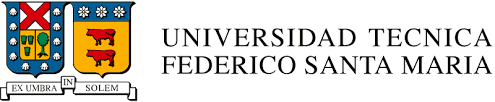</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Regularización
* SVM


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 1]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 12 de Mayo, en horario de clases.
* Fecha de entrega: 13 de Mayo. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

# 1- Regresión lineal para la predicción de la demanda de bicicletas compartidas en Seúl

La regresión lineal es un modelo matemático que pertenece al aprendizaje supervisado, el cual intenta aplicar relaciones que predigan el resultado de un evento basándose en los datos de variables independientes. Llamaremos a este resultado: variable objetivo o _target_, y como es un modelo de regresión lineal la variable objetivo es una variable continua.

<center><img src=https://t4.ftcdn.net/jpg/02/32/47/13/360_F_232471334_vfDHKHeRHtwkn0zvd8SM98THwQeYDn8y.jpg></center>

Los sistemas de bicicletas compartidas son un medio para alquilar bicicletas en el que el proceso de afiliación, alquiler y devolución se automatiza a través de una red de _quioscos o puntos de estacionamiento_ repartidos por toda la ciudad. Gracias a estos sistemas, los usuarios pueden alquilar una bicicleta en un lugar y devolverla en otro cuando lo necesiten.

En esta pregunta se le proporcionan datos de alquiler de la cantidad de bicicletas arrendadas por hora durante dos años según variables climáticas y laborales. 

Usted tiene separar el dataset en un conjunto de entrenamiento y en un conjunto de prueba, y el objetivo de esta pregunta será: **predecir el número total de bicicletas alquiladas en el conjunto de pruebas**.

La base de datos y toda la información asociada a esta se puede encontrar en el siguiente link: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Existen distintas formas para obtener los datos, de las cuales usted debe elegir solo uno:

1. Puede descargarlos y guardarlos en su directorio local y luego cargar los datos usando este notebook con Jupyter.

2. Puede utilizar google colab. En este caso existen 2 formas de cargar los datos, montando su cuenta de google drive en el colab y guardar los datos en una carpeta de drive. La otra forma es cargar los datos de forma en la máquiva virtual que le asigna colab de manera **temporal**. Tenga cuidado si elige la forma temporal ya que si por alguna razón se desconecta del ambiente, deberá volver a descargar los datos.

3. Existen muchas otras formas más pero usted puede obtener los datos con cualquier método que estime conveniente.


También es posible descargarlos mediante la [API](https://github.com/Kaggle/kaggle-api#kaggle-api) de Kaggle siguiendo las instrucciones en la sección API credentials. Si desea utilizar google colab puede seguir este tutorial [Kaggle + Colab](https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2)

Localizar y subir la api-key de kaggle

In [111]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

Otorgar permisos de lectura y escritura al archivo kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Descargar el dataset

In [ ]:
!kaggle datasets download -d saurabhshahane/seoul-bike-sharing-demand-prediction

  0% 0.00/126k [00:00<?, ?B/s]
100% 126k/126k [00:00<00:00, 38.3MB/s]


Descomprimir

In [ ]:
!unzip seoul-bike-sharing-demand-prediction.zip

Archive:  seoul-bike-sharing-demand-prediction.zip
  inflating: SeoulBikeData.csv       


### 1.1.1 Exploración del conjunto de datos




Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

In [137]:
data = pd.read_csv('C:/Users/dyess/OneDrive/Escritorio/T1 ML/SeoulBikeData.csv',encoding= 'unicode_escape')

In [138]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Explore el conjunto de datos y responda  brevemente las siguiente preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

> b) ¿Qué aspecto tienen en común las variables _Date_ y _Season_?

> c) Revise si faltan valores en los conjuntos de datos de prueba y de entrenamiento.

In [139]:
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

info = datainfo()
info

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


In [140]:
# Seleccionar variables numéricas
numericas = list(info[info['DataType'] == 'int64'].index) + list(info[info['DataType'] == 'float64'].index)
print('a) Variables numéricas:')
for i,variable in enumerate(numericas):
    print(f'   {i+1}. {variable}')
print('\n')

# Seleccionar variables categóricas
categoricas = list(info[info['DataType'] == 'object'].index)
print('   Variables categóricas:')
for i,variable in enumerate(categoricas):
    print(f'   {i+1}. {variable}')

a) Variables numéricas:
   1. Rented Bike Count
   2. Hour
   3. Humidity(%)
   4. Visibility (10m)
   5. Temperature(°C)
   6. Wind speed (m/s)
   7. Dew point temperature(°C)
   8. Solar Radiation (MJ/m2)
   9. Rainfall(mm)
   10. Snowfall (cm)


   Variables categóricas:
   1. Date
   2. Seasons
   3. Holiday
   4. Functioning Day


b) `Respuesta`: 

c) `Respuesta`: No faltarán valores en los conjuntos de datos de prueba y entrenamiento ya que el conjunto completo no posee valores NaN en ninguna de sus variables

> d) ¿Por qué la variable _Functioning Day_ no aporta ningún valor al entrenamiento. Grafique, justifique y elimine la columna.

Functioning Day:
Yes    8465
No      295
Name: Functioning Day, dtype: int64

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


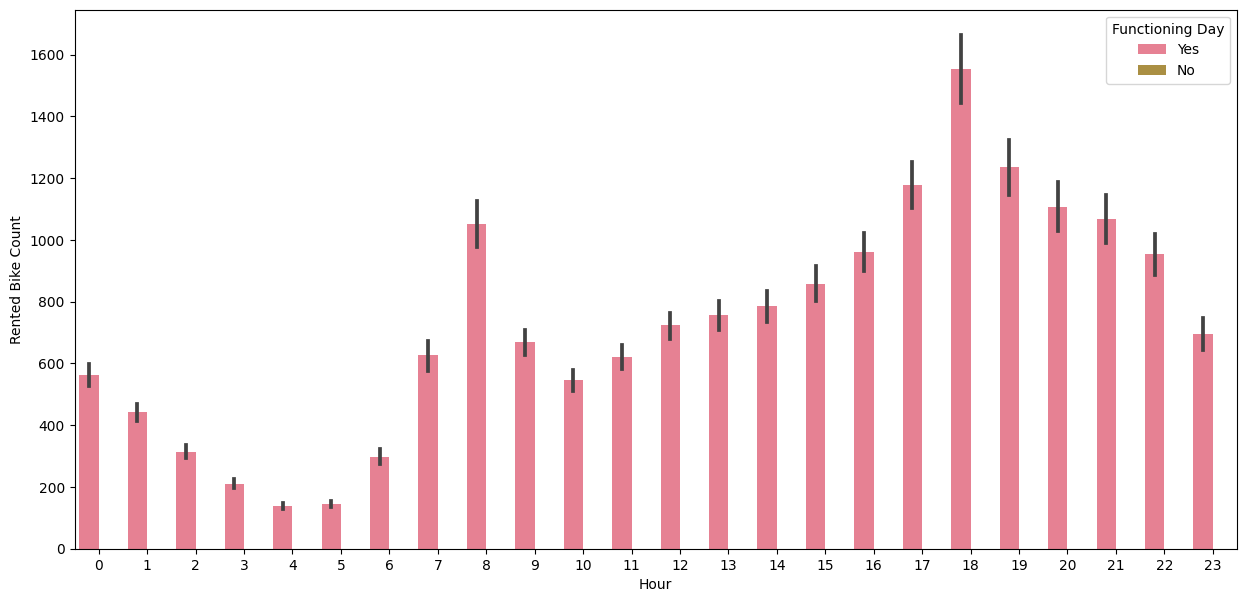

In [141]:
conteo = data['Functioning Day'].value_counts()
print(f'Functioning Day:')
print(f'{conteo}\n')

print(data[data['Functioning Day'] == 'No']['Rented Bike Count'].values)

def barplots(x,y,hue):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,hue=hue,data=data);

barplots('Hour','Rented Bike Count','Functioning Day')

In [ ]:
data.drop('Functioning Day', axis=1, inplace=True)

### 1.1.2 Exploración de Features

> a) Revise detalladamente las variables: 'Date', 'Holiday', 'Seasons' y 'Rented Bike Count' del conjunto de datos cuente y grafique su histograma.

Una vez analizado lo anterior responda las siguientes preguntas:

> b) ¿La gente arrienda más bicicletas en vacaciones o en días de trabajo?

> c) ¿Se arriendan más bicicletas los fines de semana o durante la semana?

> d) ¿De qué forma afecta el clima al arriendo de bicicletas?

Para las preguntas b), c) y d) apóyese de los gráficos.




In [142]:
# Revisamos promedios
print('DIARIO')
Rented_Bike_Count_per_day = []
for day in data['Date'].unique():
    number = data[data['Date'] == day]['Rented Bike Count'].sum()
    Rented_Bike_Count_per_day.append(number)

promedio = np.mean(Rented_Bike_Count_per_day)
desviacion_estandar = np.std(Rented_Bike_Count_per_day)
maximo = np.max(Rented_Bike_Count_per_day)
minimo = np.min(Rented_Bike_Count_per_day)

# Imprimir los resultados
print("Promedio:", promedio)
print("Desviación estándar:", desviacion_estandar)
print("Máximo:", maximo)
print("Mínimo:", minimo)

DIARIO
Promedio: 16910.449315068494
Desviación estándar: 10244.576632756347
Máximo: 36149
Mínimo: 0


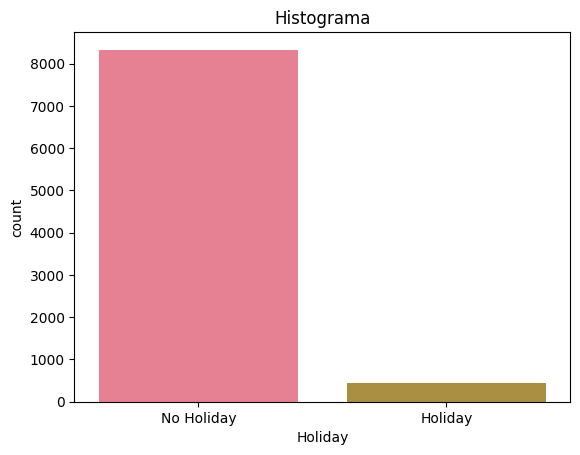

NO HOLIDAY
mean     715.228026
std      646.879124
max     3556.000000
min        0.000000
Name: Rented Bike Count, dtype: float64
--------------------------------------------
HOLIDAY
mean     499.756944
std      570.772769
max     2400.000000
min        0.000000
Name: Rented Bike Count, dtype: float64
--------------------------------------------


In [143]:
sns.countplot(x = 'Holiday', data = data)
plt.title('Histograma')
plt.show()

for hol in data['Holiday'].unique():
    print(f'{hol.upper()}')
    estadisticas = data[data['Holiday'] == hol]['Rented Bike Count'].describe()
    print(estadisticas[['mean', 'std', 'max', 'min']])
    print('--------------------------------------------')

b) `Respuesta`:  Dada la diferencia de data entre 'Holiday' y 'No Holiday' es que se decidió ver las estadísticas de la variable, las cuales muestran que la gente arrienda más bicicletas en días de trabajo que en vacaciones.

Crearemos una variable 'Weekday' con respuestas 'Yes' y 'No' dependiendo si la fecha corresponde a día de semana o fin de semana respectivamente.

In [144]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')  # Convertir la columna de fechas a tipo datetime

# Agregar una columna que indica si la fecha corresponde a un día de la semana o un fin de semana
data['Weekday'] = data['Date'].dt.weekday.apply(lambda x: 'Yes' if x < 5 else 'No')

data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Yes


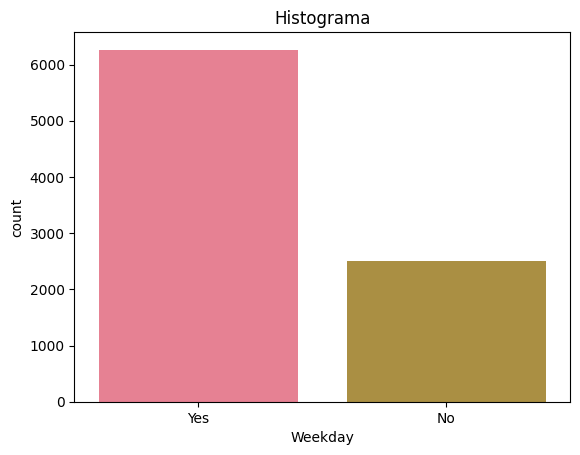

YES
mean     719.448914
std      659.329119
max     3556.000000
min        0.000000
Name: Rented Bike Count, dtype: float64
--------------------------------------------
NO
mean     667.342147
std      606.071174
max     2514.000000
min        0.000000
Name: Rented Bike Count, dtype: float64
--------------------------------------------


In [145]:
sns.countplot(x = 'Weekday', data = data)
plt.title('Histograma')
plt.show()

for day in data['Weekday'].unique():
    print(f'{day.upper()}')
    estadisticas = data[data['Weekday'] == day]['Rented Bike Count'].describe()
    print(estadisticas[['mean', 'std', 'max', 'min']])
    print('--------------------------------------------')

c) `Respuesta`: Nuevamente, dada la diferencia de data entre 'Yes' y 'No' es que se decidió ver las estadísticas de la variable, las cuales muestran que la gente arrienda más bicicletas durante la semana que en fin de semana.

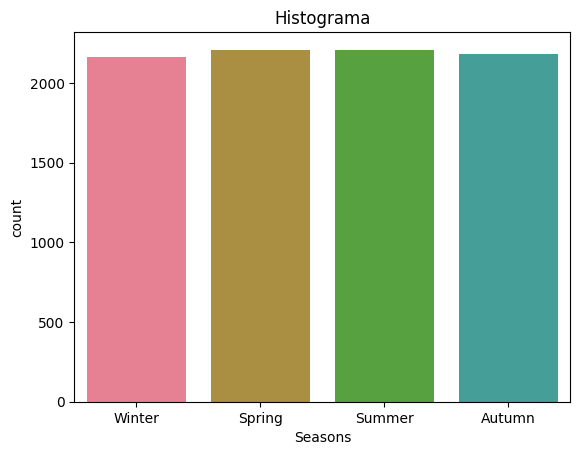

WINTER
mean    225.541204
std     150.372236
max     937.000000
min       3.000000
Name: Rented Bike Count, dtype: float64
--------------------------------------------
SPRING
mean     730.031250
std      621.509635
max     3251.000000
min        0.000000
Name: Rented Bike Count, dtype: float64
--------------------------------------------
SUMMER
mean    1034.073370
std      690.244759
max     3556.000000
min        9.000000
Name: Rented Bike Count, dtype: float64
--------------------------------------------
AUTUMN
mean     819.597985
std      651.085621
max     3298.000000
min        0.000000
Name: Rented Bike Count, dtype: float64
--------------------------------------------


In [146]:
sns.countplot(x = 'Seasons', data = data)
plt.title('Histograma')
plt.show()

for season in data['Seasons'].unique():
    print(f'{season.upper()}')
    estadisticas = data[data['Seasons'] == season]['Rented Bike Count'].describe()
    print(estadisticas[['mean', 'std', 'max', 'min']])
    print('--------------------------------------------')

d) `Respuesta`: Las estadísticas de la variable 'Season' muestran que la gente arrienda considerablemente menos bicicletas en invierno. Por otro lado, las estaciones otoño, primavera y verano presentan una alta demanda, siendo el verano aquella con la más alta.

<AxesSubplot: xlabel='Date', ylabel='Rented Bike Count'>

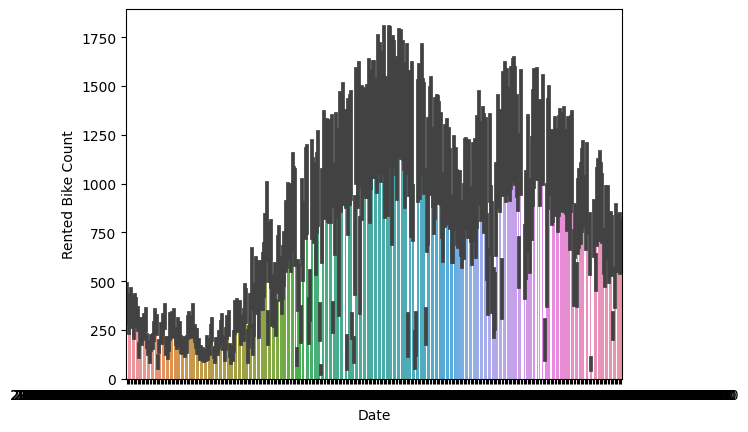

In [147]:
sns.barplot(data=data, x='Date', y='Rented Bike Count')

> e) Grafique el promedio de bicicletas arrendadas por estación ('Seasons').

Responda las siguientes preguntas:

> f) ¿Cuáles son las estaciones en las que más se arriendan bicicletas?

> g) Transforme la fecha en variables numéricas, es decir, si _Date_ es 01/12/2017, entonces obtenga _Año_=2017, _mes_=12, _día_=1. Agreguelas al dataframe.

In [149]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['dayofweek'] = data['Date'].dt.dayofweek

data.drop('Date', axis=1, inplace=True)

data.head()

KeyError: 'Date'

> h) Grafique y analice de forma general la correlación entre las variables **numéricas**. 

In [ ]:
data_corr= data.corr()       
plt.figure(figsize=(12,12))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

> i) Escriba sus conclusiones sobre los resultados encontrados en la correlación en la pregunta h)

### 1.1.3 Separación de conjuntos

> a) Divida el dataset en features _X_ y target _y_, además divida el dataset en un subconjunto de entrenamiento y otro de prueba.

In [37]:
X=data.drop('Rented Bike Count',axis=1)
y=data['Rented Bike Count']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify...

> a) ¿Para qué es el parámetro stratify?

> b) Aplique Label Encoding a las variables _Seasons_ y _Holiday_ en el conjunto de entrenamiento y responda para qué sirve y como se usa.

In [42]:
le = preprocessing.LabelEncoder()
X_train["Seasons"] = le.fit_transform(X_train["Seasons"])
X_train["Holiday"] = le.fit_transform(X_train["Holiday"])

> c) Aplique la transformación aprendida por el Label Encoder al conjunto de prueba.

In [ ]:
X_test["Seasons"] = le.transform(X_test["Seasons"])
X_test["Holiday"] = le.transform(X_test["Holiday"])

> d) ¿Por qué no se aplica la transformación del Label Encoder directamente sobre el conjunto de datos completo?

## 1.2 Modelos de Regresión

Primero entrenaremos un regresor lineal con los datos _en bruto_, ya que básicamente se transformaron las variables _Date_, _Seasons_ y _Holiday_ tal que todos los datos se puedan procesar por el regresor.

### 1.2.1 Modelo en bruto

> a) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

> b) Obtenga el error cuadrático medio de la predicción sobre los datos del conjunto *X_test*

In [ ]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

> c) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

In [ ]:
plt.scatter(y_test, y_pred)

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

### 1.2.2 Modelo preprocesado

Variables cíclicas

Si aplicaramos variables _Dummy_ o transformar con _One Hot Encoder_ a la fecha terminaríamos con 12 columnas para los meses, 7 columnas para los días de la semana y 24 columnas para la hora! En lugar de eso nos aprovecharemos de que todas estas variables son cíclicas, es decir, después de 23:00 hrs viene 00:00 hrs y el ciclo se vuelve a repetir, lo mismo para los meses del año y los días de la semana. Entonces podemos pensar en este ciclo como si fuera un _circulo_ utilizando el seno y el coseno de la fecha tenemos las coordenada de la fecha en el _circulo_. De esta forma las 23:00 y las 00:00 son cercanas en esta representación. Gracias a lo anterior nos quedamos con solo 2 columnas.

$\text{var_cos} = \cos(2π\; \text{var}/\text{periodo})$

$\text{var_sin} = \sin(2π\; \text{var}/\text{periodo})$

> a) ¿Por qué no simplemente usar solo el seno o solo el coseno?


In [ ]:
X_train['month_sin'] = np.sin(2 * np.pi * X_train['month'] / 12)
X_train['month_cos'] = np.cos(2 * np.pi * X_train['month'] / 12)
X_train['hour_sin'] = np.sin(2 * np.pi * X_train['Hour'] / ?)
X_train['hour_cos'] = ...

X_test['month_sin'] = np.sin(2 * np.pi * X_test['month'] / 12)
X_test['month_cos'] = np.cos(2 * np.pi * X_test['month'] / 12)
X_test['hour_sin'] = np.sin(2 * np.pi * X_test['Hour'] / ?)
X_test['hour_cos'] = ...

X_train.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)
X_test.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)

Estación

> b) Aplique la misma lógica de variable _cíclica_ a la variable _Season_.

In [ ]:
X_train['Sin_Season'] = np.sin(2 * np.pi * X_train['Seasons'] / ?) 
X_train['Cos_Season'] = np.cos(2 * np.pi * X_train['Seasons'] / ?)
X_train.drop('Seasons', axis=1, inplace=True)

In [ ]:
X_test['Sin_Season'] = ...
X_test['Cos_Season'] = ...
X_test.drop('Seasons', axis=1, inplace=True)

Normalización de variables.

> c) Transforme las variables para que estas sigan una distribución normal con media 0 y varianza 1.



In [ ]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = ['Temperature(°C)', 
                     'Humidity(%)', 
                     'Wind speed (m/s)', 
                     'Visibility (10m)', 
                     'Dew point temperature(°C)', 
                     'Solar Radiation (MJ/m2)',	
                     'Rainfall(mm)',	
                     'Snowfall (cm)',
                     'year']

X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize])
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])

> d) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

> e) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [ ]:
y_pred = reg.predict(X_test)

y_pred = y_scaler.inverse_transformy_pred

"""
Su código aquí
"""

> f) Calcule el error cuadrático medio en la escala original de bicicletas

In [ ]:
mean_squared_error(y_test, y_pred)

> g) ¿Mejoran los resultados con respecto al modelo entrenado sobre los datos en bruto?

> h) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

In [ ]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

### 1.2.3 Modelo SGD

En esta pregunta aplicaremos el modelo de regresión lineal utilizando el gradiente descendente estocástico (SGD), y para visualizar su rendimiento observaremos el error cuadrático medio a medida que el algoritmo SGD va iterando a través de las _epochs_. Para ello necesitamos separar una porción del conjunto de entrenamiento y así obtener el error de validación del modelo en ejemplos que no ha visto.

> a) Separe el conjunto de entrenamiento en un subconjunto de entrenamiento y uno de validación.

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25)

Utilize la librería _sklearn_ para entrenar el modelo a través _SGDRegressor_ y responda las siguientes preguntas:

> b) ¿Para qué sirve cada uno de los parametros que acepta _SGDRegressor_? Describa brevemente cada uno.

> c) Explique cuál es la función del parámetro alpha y compare, teóricamente, las variaciones de implementación del parámetro disponibles en el módulo, es decir, compare: _constant_ vs _optimal_ vs _invscaling_ vs _adaptive_.

In [ ]:
reg = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                          
                   warm_start=True,
                   ...)
"""
Su código aquí
"""

Entrene el regresor SGD por 100 _epochs_ como máximo, utilizando *early_stoping* con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por epoca y responda las siguientes preguntas:

> d) ¿Para qué sirve el *early_stoping*?

> e) ¿Cómo se interpretan los resultados del entrenamiento según las curvas obtenidas?

> f) ¿Cuántas _epochs_ duró su entrenamiento?

In [ ]:
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors, val_errors = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop tring if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):
    
    reg.partial_fit(X_tr, y_tr)
    
    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break    

Stopping training after 23 epochs


In [ ]:
plt.plot(tr_errors, label='train error')
plt.plot(val_errors, label='validation error')
plt.legend()
plt.show()

> g) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [ ]:
y_pred = reg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred)

"""
Su código aquí
"""

> h) Calcule el error cuadrático medio en la escala original de bicicletas

In [ ]:
mean_squared_error(y_test, y_pred)

> i) ¿Mejoran los resultados con respecto al modelo anterior?

> j) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

In [ ]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

## 1.3 Modelo con Regularización

### 1.3.1 Regularización Ridge y Lasso

Agregue regularización Ridge al modelo SGD y entrénelo por 100 _epochs_ como máximo, utilizando early_stoping con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por _epoch_ y responda las siguientes preguntas:

> a) ¿Qué son los llamados _hiperparámetros_ de un modelo y como se relacionan con el concepto de _hyper tuning_?

> b) ¿Cuál es la motivación de agregar una penalización al modelo?

> c) ¿De qué se compone la penalización mediante regularización Ridge?

> d) ¿Cómo funciona la regularización Lasso?

> e) ¿Cuáles son las ventajas y desventajas de usar regularización Ridge versus Lasso?

> f) Utilizando GridSearchCV optimize el hiperparámetro _learning rate_ para los valores 0.1, 0.01, 0.001.

> g) Pruebe con distintos tipos de _learning rate_ 'constant', 'optimal', 'invscaling'.

> h) Optimize también los hiperparámetros de coeficiente de regularización de l2 y l1 para los valores 0.0001, 0.001, 0.01.



> **Nota:** Investigue y lea la documentación de SGDRegressor, de KFold y de GridSearchCV antes de modificar y ejecutar el código, recuerde que el código presentado en el notebook es solo una guía de referencia y no necesariamente funciona, usted puede modificar su propio código y explicar su funcionamiento.

In [ ]:
k=5
cv_folds=KFold(n_splits=k, shuffle=True)

In [ ]:
reg = SGDRegressor(loss='squared_error', 
                   penalty='l2', # regularization therm
                   alpha=0.0001, # regularization coeficient
                   max_iter=100, #epochs
                   tol=0.001, 
                   shuffle=True,                                       
                   learning_rate='invscaling', # type of lr
                   eta0=0.01,    # learning rate coeficient
                   power_t=0.25                   
                   )

In [ ]:
param_grid = {'eta0': [0.1, 0.01, 0.001], 
              'penalty': ['l2', 'l1']
              'alpha': [0.0001, 0.001, 0.01],                
              'learning_rate': ['constant', 'optimal', 'invscaling']}

hypereg = GridSearchCV(reg, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

In [ ]:
hypereg.fit(X_train, y_train)

> i) Obtenga los resultados para cada hiperparámetro de la grilla.

In [ ]:
pd.DataFrame(hypereg.cv_results_)

> j) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [ ]:
y_pred = hypereg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred)

"""
Su código aquí
"""

> k) Calcule el error cuadrático medio en la escala original de bicicletas

In [ ]:
mean_squared_error(...)

> l) ¿Mejoran los resultados con respecto a los modelo anteriores?

> m) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

In [ ]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()